In [1]:
import sys
sys.path.append('../package')
import lostark as lok
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = "C:/Users/user/Code_Files_Jupyter/nanum-all/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns', None)

In [2]:
df = lok.get_table_df('engraving_table')

In [3]:
df.head(2)

,characterCode,grantName1,grantPoint1,grantName2,grantPoint2,engraving1_name,engraving1_level,engraving2_name,engraving2_level,engraving3_name,engraving3_level,engraving4_name,engraving4_level,engraving5_name,engraving5_level,engraving6_name,engraving6_level,engraving7_name,engraving7_level,engraving8_name,engraving8_level,engraving9_name,engraving9_level,engraving10_name,engraving10_level,engraving11_name,engraving11_level,engraving12_name,engraving12_level,engraving13_name,engraving13_level,engraving14_name,engraving14_level,engraving15_name,engraving15_level
0,1,원한,12,저주받은 인형,12.0,원한,3.0,저주받은 인형,3.0,공격속도 감소,1.0,공격력 감소,1.0,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None
1,3,만개,9,만개,9.0,만개,3.0,중갑 착용,3.0,약자 무시,1.0,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None


In [4]:
for i in range(0, len(df.columns), 20):
    df.iloc[:, i:i+20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437407 entries, 0 to 437406
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   characterCode     437407 non-null  int64  
 1   grantName1        437407 non-null  object 
 2   grantPoint1       437407 non-null  int64  
 3   grantName2        435127 non-null  object 
 4   grantPoint2       435127 non-null  float64
 5   engraving1_name   437239 non-null  object 
 6   engraving1_level  437239 non-null  float64
 7   engraving2_name   431981 non-null  object 
 8   engraving2_level  431981 non-null  float64
 9   engraving3_name   419995 non-null  object 
 10  engraving3_level  419995 non-null  float64
 11  engraving4_name   400967 non-null  object 
 12  engraving4_level  400967 non-null  float64
 13  engraving5_name   341254 non-null  object 
 14  engraving5_level  341254 non-null  float64
 15  engraving6_name   169330 non-null  object 
 16  engraving6_level  16

In [68]:
res = pd.DataFrame()
res['engraving_name'] = pd.concat([df[f'engraving{i}_name'] for i in range(1, 13, 2)], axis=0, ignore_index=True)
res['engraving_level'] = pd.concat([df[f'engraving{i}_level'] for i in range(2, 14, 2)], axis=0, ignore_index=True)
res.dropna(inplace=True)
res = res.groupby('engraving_name').sum().sort_values(by='engraving_level', ascending=False).reset_index()

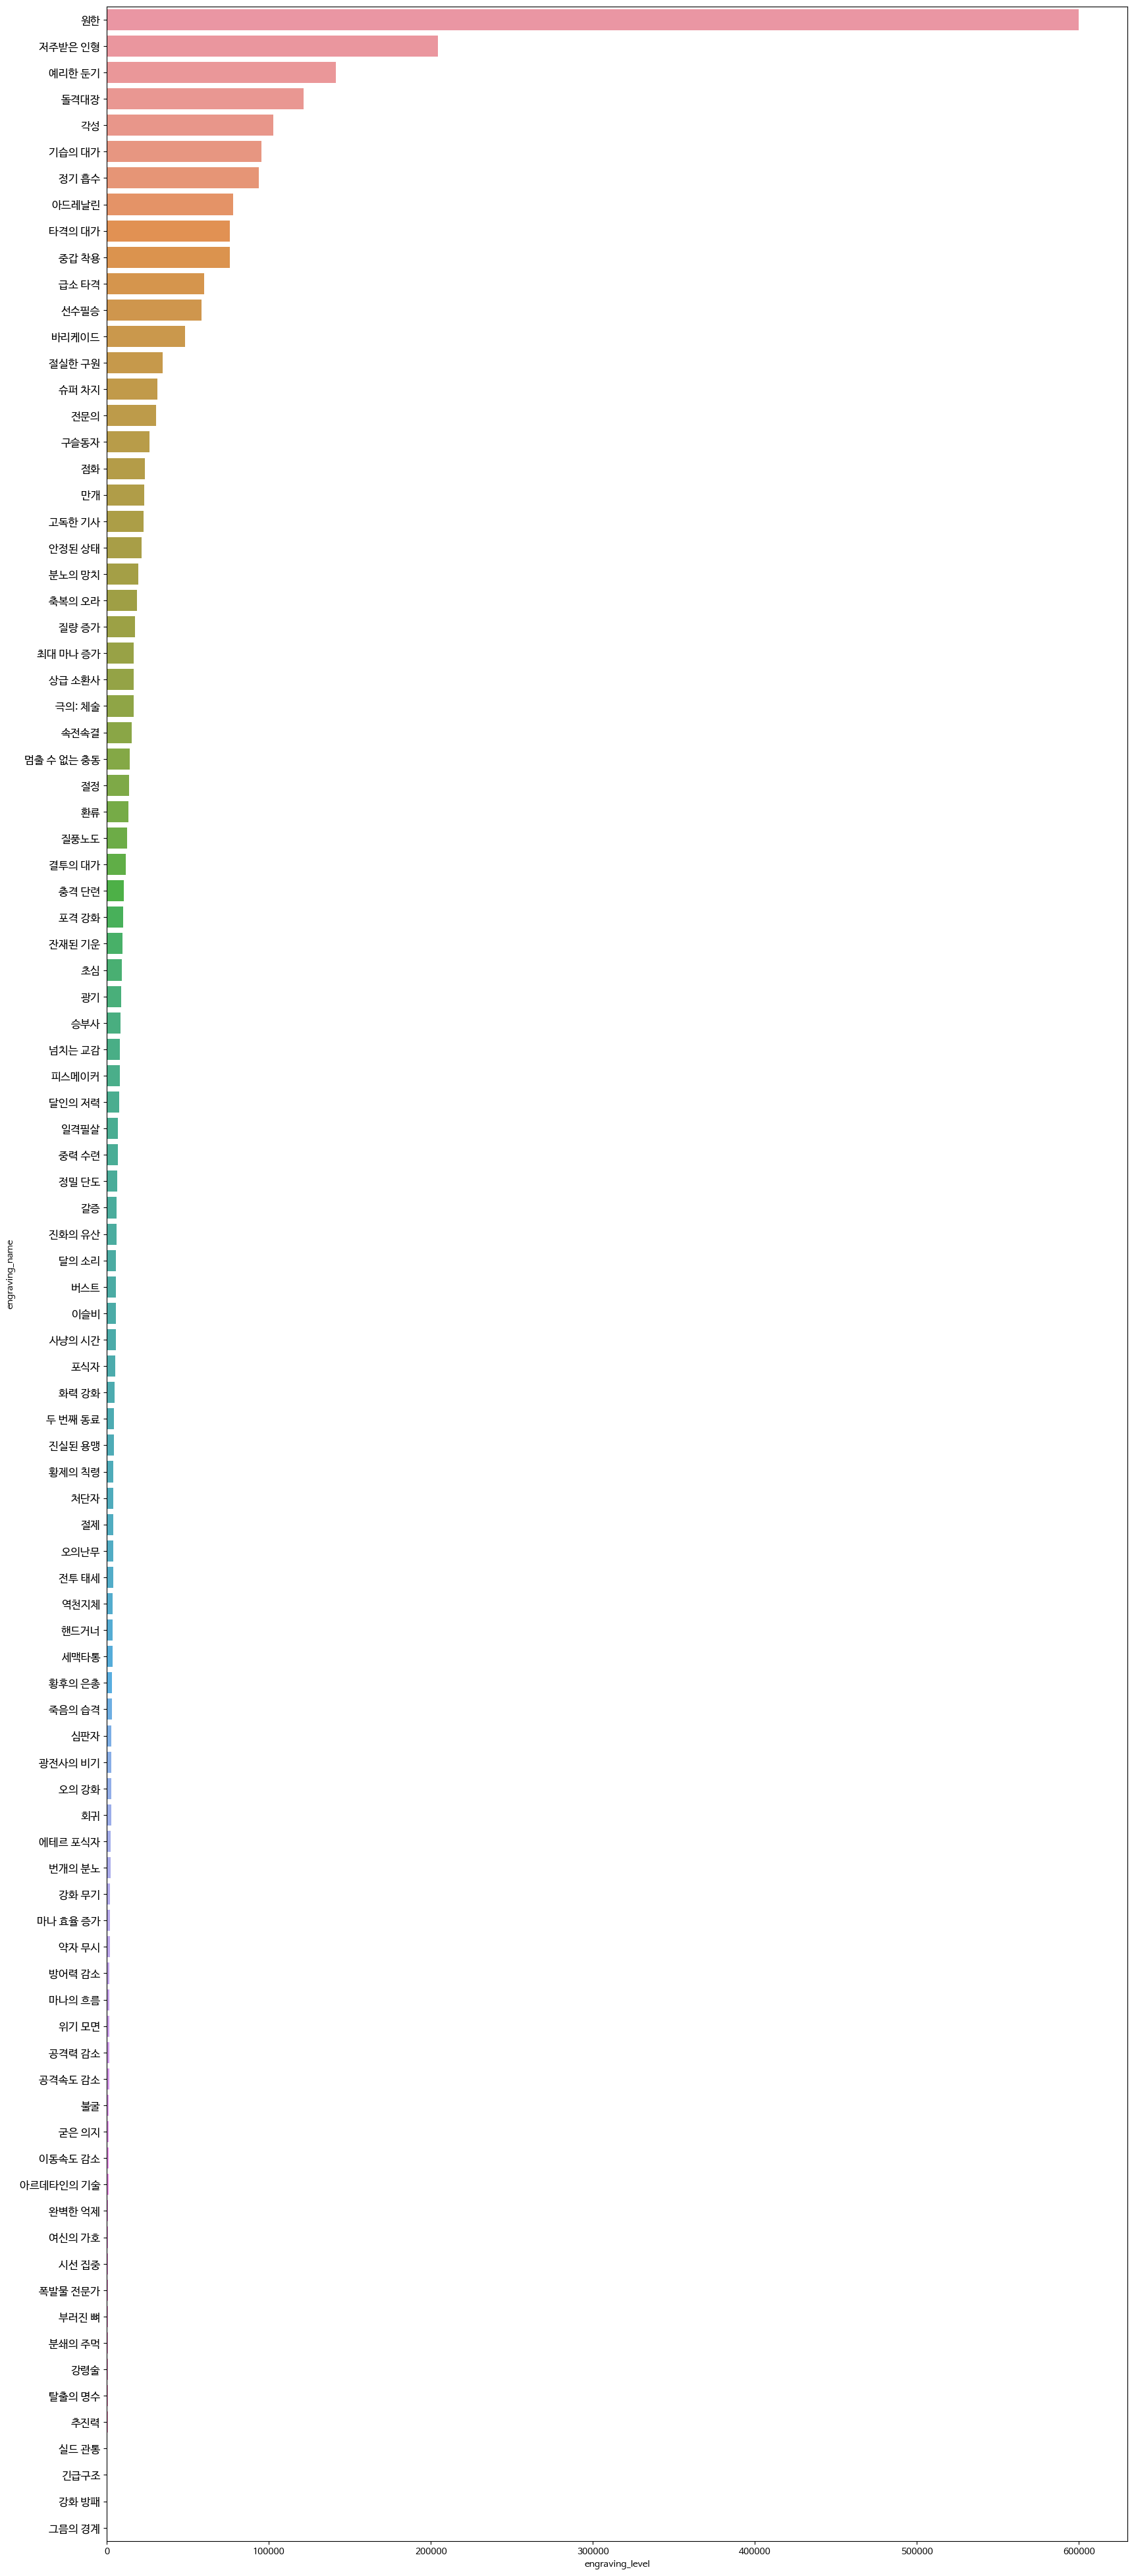

In [67]:
plt.figure(figsize=(20,50))
sns.barplot(x=res['engraving_level'], y=res['engraving_name'], orient='h')
plt.yticks(fontsize=12)
plt.show()

In [81]:
dfc = df.copy()
res = pd.DataFrame()
for i in range(1, 13):
    res[f'en{i}'] = dfc[f'engraving{i}_name'] + ": " + dfc[f'engraving{i}_level'].astype(str)
res = res.apply(lambda row: row.sort_values().values, axis=1, result_type='expand')
columns = [f'en{i}' for i in range(1, 13)]
res.columns = columns
res

,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12
0,공격력 감소: 1.0,공격속도 감소: 1.0,원한: 3.0,저주받은 인형: 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,만개: 3.0,약자 무시: 1.0,중갑 착용: 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,기습의 대가: 3.0,슈퍼 차지: 3.0,아드레날린: 1.0,원한: 3.0,잔재된 기운: 3.0,저주받은 인형: 3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,기습의 대가: 3.0,돌격대장: 3.0,아드레날린: 2.0,오의난무: 1.0,원한: 3.0,질량 증가: 3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,멈출 수 없는 충동: 3.0,방어력 감소: 1.0,예리한 둔기: 1.0,추진력: 1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
437402,공격력 감소: 1.0,선수필승: 3.0,예리한 둔기: 1.0,저주받은 인형: 3.0,진실된 용맹: 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437403,각성: 1.0,공격력 감소: 1.0,공격속도 감소: 1.0,광전사의 비기: 1.0,돌격대장: 1.0,선수필승: 1.0,저주받은 인형: 1.0,질량 증가: 1.0,NaN,NaN,NaN,NaN
437404,돌격대장: 1.0,선수필승: 3.0,예리한 둔기: 3.0,절정: 3.0,질량 증가: 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437405,슈퍼 차지: 3.0,아드레날린: 3.0,예리한 둔기: 3.0,원한: 3.0,잔재된 기운: 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


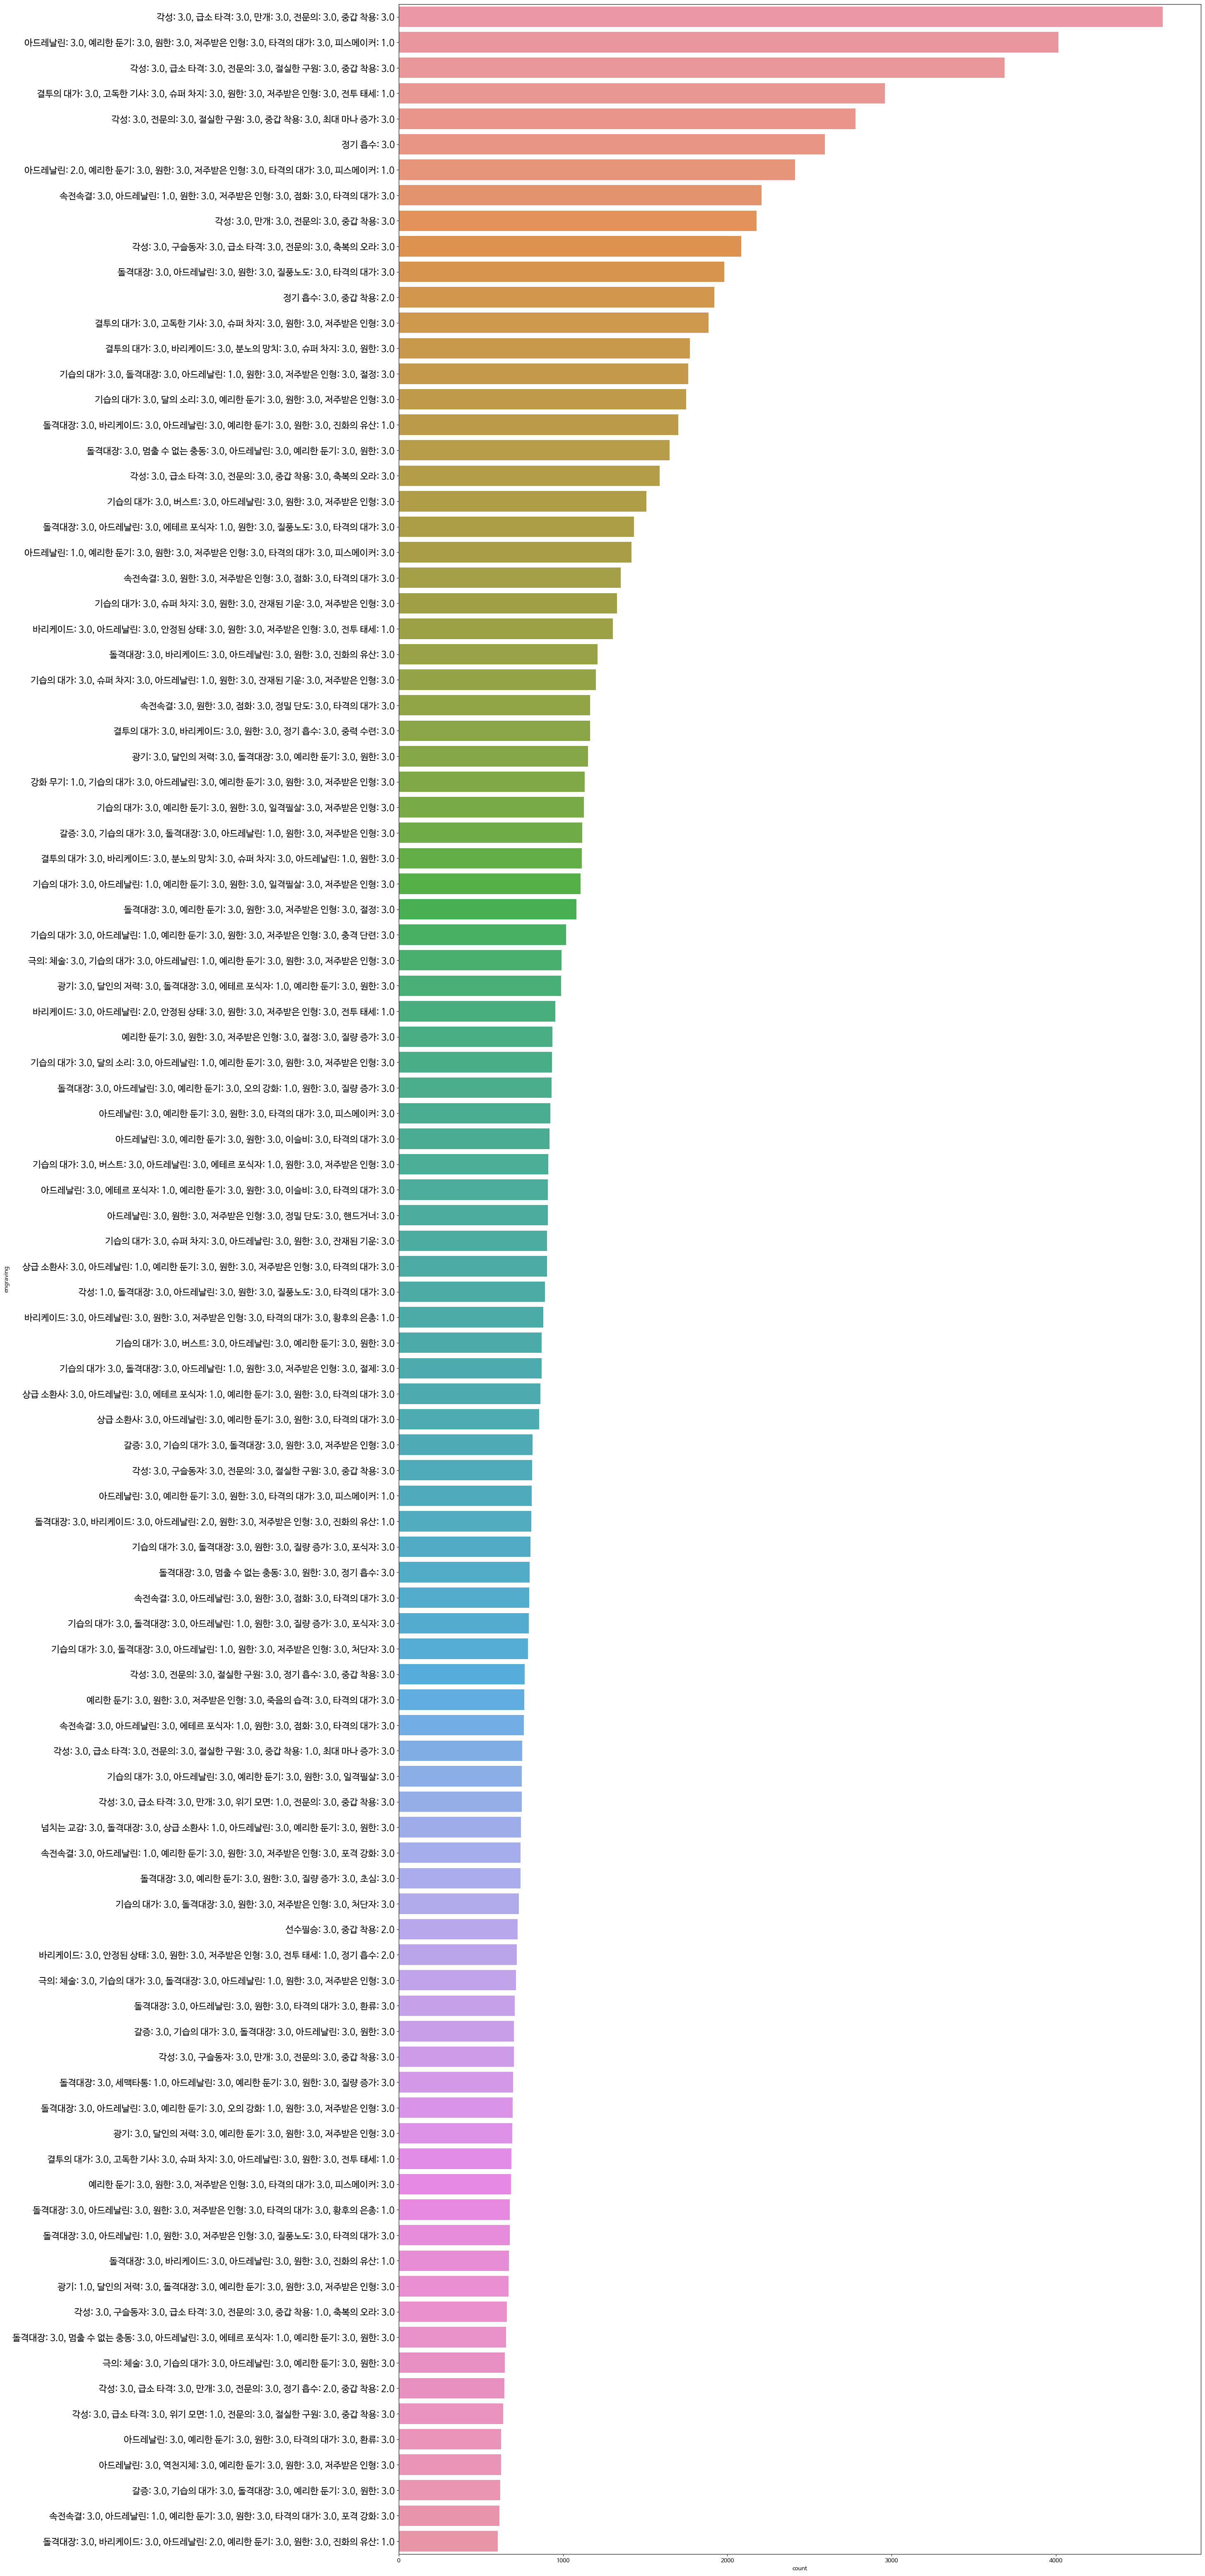

In [98]:
result = res.apply(lambda row: ', '.join(map(str, row)).replace(', nan', ''), axis=1).to_frame('engraving')
result = result.value_counts().to_frame('count').reset_index()

plt.figure(figsize=(25, 80))
sns.barplot(x=result['count'], y=result['engraving'][:100], orient='h')
plt.yticks(fontsize=16)
plt.show()
# 직업별 각인 세팅
